In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import random

In [6]:
import os
import warnings
from keras import backend as K
warnings.filterwarnings('ignore')

os.environ['PYTHONHASHSEED'] = '0'


In [10]:
with open('D_origin.pickle', 'rb') as f:
    Data_186 = pickle.load(f)
Data_186.tail()

,grid_5.0,grid_5.02,grid_5.04,grid_5.06,grid_5.08,grid_5.1,grid_5.12,grid_5.14,grid_5.16,grid_5.18,...,grid_49.84,grid_49.86,grid_49.88,grid_49.9,grid_49.92,grid_49.94,grid_49.96,grid_49.98,grid_50.0,label
181,84.60850,41.40390,35.79080,31.55780,28.27960,34.70620,32.90870,31.54500,30.54580,29.87050,...,10.14370,10.62390,11.25010,11.43290,11.41600,11.70280,12.10440,11.80480,10.52120,DUT-12
182,79.33250,72.94920,67.30430,62.28830,57.81150,53.79950,50.19020,46.93170,43.98000,41.29780,...,3.25574,2.74268,2.48742,2.44366,2.60915,3.04100,3.84124,5.08838,6.59545,DUT-23
183,191.41700,180.64100,171.74800,164.49800,158.70700,154.23400,150.97800,148.86900,147.86600,147.95700,...,12.14760,9.69592,7.65471,6.44864,5.58832,4.58451,3.64423,3.01059,2.68691,DUT-7
184,0.05583,0.05823,0.06078,0.06351,0.06643,0.06955,0.07289,0.07648,0.08035,0.08451,...,1.58177,1.46130,1.40265,1.39206,1.40925,1.48148,1.59691,1.76235,1.98970,MOF-5
185,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,109.47500,98.06060,99.42020,110.37700,127.07900,141.06900,141.72400,124.05100,103.20700,MOF-72


In [15]:
with open('T_origin.pickle', 'rb') as f:
    Data_14 = pickle.load(f)
Data_14

,grid_5.0,grid_5.02,grid_5.04,grid_5.06,grid_5.08,grid_5.1,grid_5.12,grid_5.14,grid_5.16,grid_5.18,...,grid_49.84,grid_49.86,grid_49.88,grid_49.9,grid_49.92,grid_49.94,grid_49.96,grid_49.98,grid_50.0,label
0,2276.670,2320.000,2140.000,2353.330,2206.670,2263.330,2173.330,2223.330,2203.330,2060.000,...,2480.000,2360.000,2406.670,2426.6700,2343.3300,2313.3300,2300.0000,2393.3300,2410.000,ZIF-67
1,2070.000,2286.670,2176.670,2136.670,2113.330,2166.670,2260.000,2120.000,2256.670,2123.330,...,2183.330,2053.330,2080.000,1976.6700,2110.0000,2160.0000,2080.0000,2106.6700,2150.000,ZIF-67
2,1456.670,1293.330,1456.670,1513.330,1536.670,1343.330,1430.000,1400.000,1423.330,1566.670,...,2436.670,2380.000,2336.670,2296.6700,2403.3300,2443.3300,2393.3300,2386.6700,2496.670,ZIF-67
3,1010.000,1095.000,1220.000,1175.000,1055.000,1055.000,1180.000,1120.000,1050.000,1110.000,...,1065.000,1155.000,1045.000,1145.0000,955.0000,1135.0000,1050.0000,1135.0000,1080.000,ZIF-67
4,490.000,513.333,496.667,423.333,493.333,453.333,496.667,440.000,530.000,500.000,...,103.333,126.667,106.667,130.0000,96.6667,80.0000,100.0000,116.6670,106.667,ZIF-71
5,376.667,450.000,436.667,466.667,430.000,420.000,400.000,440.000,480.000,366.667,...,133.333,123.333,123.333,96.6667,106.6670,103.3330,86.6667,93.3333,116.667,ZIF-71
6,473.333,466.667,470.000,503.333,496.667,436.667,426.667,496.667,503.333,433.333,...,120.000,126.667,103.333,116.6670,66.6667,96.6667,143.3330,136.6670,146.667,ZIF-71
7,516.667,453.333,473.333,460.000,476.667,460.000,456.667,443.333,423.333,416.667,...,226.667,243.333,243.333,190.0000,210.0000,213.3330,160.0000,210.0000,210.000,ZIF-8
8,550.000,586.667,563.333,656.667,650.000,560.000,590.000,596.667,660.000,460.000,...,300.000,253.333,223.333,256.6670,303.3330,213.3330,273.3330,233.3330,240.000,ZIF-8
9,593.333,576.667,620.000,546.667,553.333,623.333,570.000,626.667,563.333,533.333,...,296.667,263.333,276.667,266.6670,273.3330,220.0000,243.3330,256.6670,280.000,ZIF-8


In [23]:
import matplotlib.pyplot as plt

array(['ZIF-67', 'ZIF-67', 'ZIF-67', 'ZIF-67', 'ZIF-71', 'ZIF-71',
       'ZIF-71', 'ZIF-8', 'ZIF-8', 'ZIF-8', 'ZIF-8', 'ZIF-90', 'ZIF-90',
       'ZIF-90'], dtype=object)

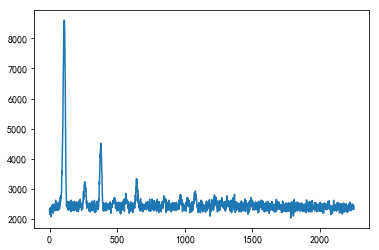

In [86]:
test_file="T_origin.pickle"
tmp = np.load(test_file)
data_14 = tmp.values
data_zif90 = data_14[0,:2251]

x1 = np.linspace(0, 2252,num=2251)
y1 = data_zif90
#y1.shape
plt.plot(x1, y1)
data_label = data_14[:,-1]
data_label

In [116]:
data_zif67 = data_14[0,-1]
data_zif90 = data_14[-3,-1]
data_zif90

'ZIF-90'

((array([182], dtype=int64),),
 (array([155], dtype=int64),),
 (array([164], dtype=int64),),
 (array([122], dtype=int64),))

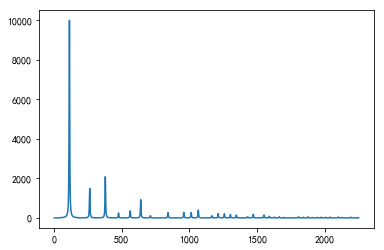

In [106]:
original_file="D_origin.pickle"
tmp = np.load(original_file)
data_186 = tmp.values

data_zif90_download = data_186[-11,:2251]
#data_zif90_original

x2 = np.linspace(0, 2252, num=2251)
y2 = data_zif90_download
plt.plot(x2, y2)
data_label_186 = data_186[:,-1]
#data_label_186
index_DUT23 = (np.where(data_label_186 == 'DUT-23'))
index_ZIF8 = np.where(data_label_186 == 'ZIF-8')
index_ZIF65 = np.where(data_label_186 == 'ZIF-65')
index_JOSNAG01 = np.where(data_label_186 == 'JOSNAG01')

data_DUT23_download = data_186[182,:2251]
data_ZIF8_download = data_186[155,:2251]
data_ZIF65_download = data_186[164,:2251]
data_JOSNAG01_download = data_186[122,:2251]

index_DUT23,index_ZIF8,index_ZIF65,index_JOSNAG01

#np.where(data_label_186)

# 绘制网上下载数据和真实数据得对比图

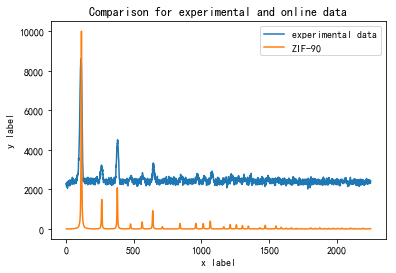

In [111]:
x = np.linspace(0, 2252, num=2251)

plt.plot(x, data_zif90, label='experimental data')
plt.plot(x, data_zif90_download, label='ZIF-90')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Comparison for experimental and online data")

plt.legend()

plt.show()

# 绘制与zif - 90 接近得 4个数据

'DUT-23', 'ZIF8', 'ZIF-65', 'JOSNAG01']

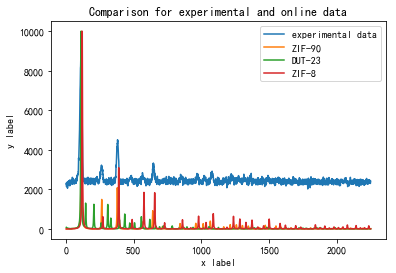

In [113]:
x = np.linspace(0, 2252, num=2251)

plt.plot(x, data_zif90, label='experimental data')
plt.plot(x, data_zif90_download, label='ZIF-90')
plt.plot(x, data_DUT23_download, label='DUT-23')
plt.plot(x, data_ZIF8_download, label='ZIF-8')
#plt.plot(x, data_ZIF65_download, label='ZIF-65')
#plt.plot(x, data_JOSNAG01_download, label='JOSNAG01')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Comparison for experimental and online data")

plt.legend()

plt.show()

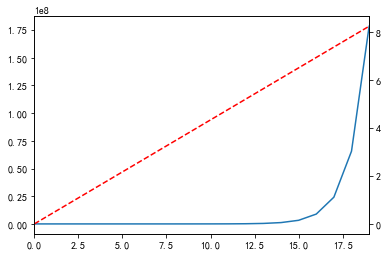

In [63]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure()
x=pd.Series(np.exp(np.arange(20)))
p1=x.plot(label=u'原始数据图')
#plt.ylabel('正常坐标')
x2=pd.Series(np.log10(x)) #np.log()是以e为底的
p2=x2.plot(secondary_y=True,style='--',color='r',)
#plt.yticks(plt.yticks()[0],['$10^%d$'%w for w in range(len(plt.yticks()[0]))])
#x.plot(logy=True,label=u'对数数据图',legend=True,secondary_y=True,style='--',color='r') #这里不能用这个，因为它会同时改变图中的x坐标轴和y坐标轴
#plt.ylabel('指数坐标')
#blue_line = mlines.Line2D([],[],linestyle='-',color='blue',markersize=2, label=u'原始数据图')
#red_line= mlines.Line2D([],[],linestyle='--',color='red',markersize=2, label=u'对数数据图')
#plt.legend(handles=[blue_line,red_line],loc='upper left')
#plt.grid(True)
plt.show()